In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
import random

In [2]:
data_dir = "D:/PlantVillage"  
img_size = 224
batch_size = 32

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(data_dir, target_size=(img_size, img_size), batch_size=batch_size, class_mode='categorical', subset='training')
val_generator = train_datagen.flow_from_directory(data_dir, target_size=(img_size, img_size), batch_size=batch_size, class_mode='categorical', subset='validation')

Found 231 images belonging to 1 classes.
Found 57 images belonging to 1 classes.


In [3]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
for layer in base_model.layers:
    layer.trainable = False

In [4]:
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

In [5]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator, validation_data=val_generator, epochs=5)

C:\Users\indum\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


C:\Users\indum\anaconda3\Lib\site-packages\keras\src\ops\nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
C:\Users\indum\anaconda3\Lib\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 131s 18s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 121s 17s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 115s 15s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 117s 15s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 112s 14s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [11]:
class_names = list(train_generator.class_indices.keys())
sample_imgs, sample_labels = next(val_generator)
preds = model.predict(sample_imgs)
pred_classes = np.argmax(preds, axis=1)
true_classes = np.argmax(sample_labels, axis=1)

C:\Users\indum\anaconda3\Lib\site-packages\keras\src\ops\nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step


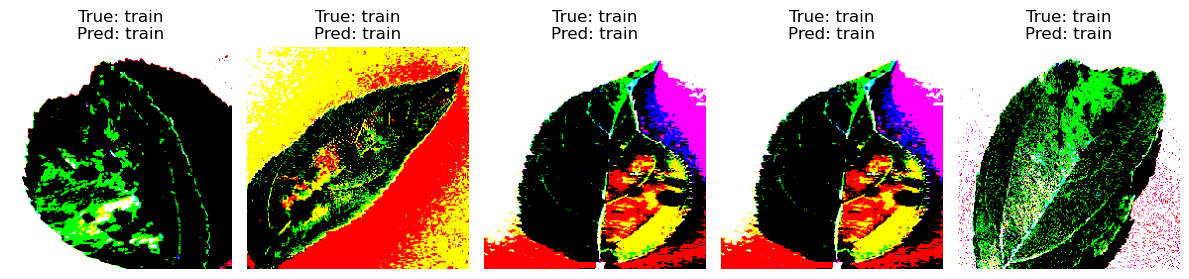

In [19]:
plt.figure(figsize=(12, 8))
for i in range(5):
    idx = random.randint(0, len(sample_imgs) - 1)
    img = (sample_imgs[idx] + 1) / 2  
    img = np.clip(img, 0, 1)          

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f"True: {class_names[true_classes[idx]]}\nPred: {class_names[pred_classes[idx]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()